<a href="https://colab.research.google.com/github/mhyls26/CCMACLRL_EXERCISES_COM231ML/blob/main/Exercise3/cadiz_Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Dataset File

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt = pd.read_csv(test_url)

print("✅ Training set shape:", df.shape)
print("✅ Test set shape:", dt.shape)
print("\nFirst 5 rows of training set:")
print(df.head())

✅ Training set shape: (891, 12)
✅ Test set shape: (418, 11)

First 5 rows of training set:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0         

In [ ]:

df['Age'] = df['Age'].fillna(df['Age'].median())
dt['Age'] = dt['Age'].fillna(dt['Age'].median())

df['Fare'] = df['Fare'].fillna(df['Fare'].median())
dt['Fare'] = dt['Fare'].fillna(dt['Fare'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
dt['Embarked'] = dt['Embarked'].fillna(dt['Embarked'].mode()[0])


In [ ]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
dt['Title'] = dt['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Simplify titles
for data in [df, dt]:
    data['Title'] = data['Title'].replace(['Mlle','Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace(
        ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev',
         'Sir','Jonkheer','Dona'], 'Rare')

print("\nUnique Titles in training set:", df['Title'].unique())

# Convert categorical to numeric
for col in ['Sex', 'Embarked', 'Title']:
    df[col] = pd.factorize(df[col])[0]
    dt[col] = pd.factorize(dt[col])[0]



Unique Titles in training set: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [ ]:
df = pd.get_dummies(df, columns=['Embarked','Sex'])
dt = pd.get_dummies(dt, columns=['Embarked','Sex'])

In [ ]:
dt.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,True,False,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,False,True,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,True,False,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,False,True,False,True,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,False,True,False,False,True


In [ ]:
features = ['Pclass','Age','SibSp','Parch','Fare','Embarked_0','Embarked_1','Embarked_2','Sex_0', 'Sex_1']
X_train = df[features]
y_train = df['Survived']
X_test = dt[features]

print("\n✅ Features used for training:")
print(features)


✅ Features used for training:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1']


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print("\nTrain set shape:", X_train.shape, "Validation set shape:", X_val.shape)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
val_acc = model.score(X_train, y_train)
print("Model Accuracy:", val_acc)

Model Accuracy: 0.8013468013468014


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Top features influencing survival:
    Feature  Coefficient
1       Sex     2.280112
0    Pclass    -0.882744
3     SibSp    -0.371883
7     Title     0.352212
4     Parch    -0.149611
6  Embarked     0.092102
2       Age    -0.025667
5      Fare     0.003971


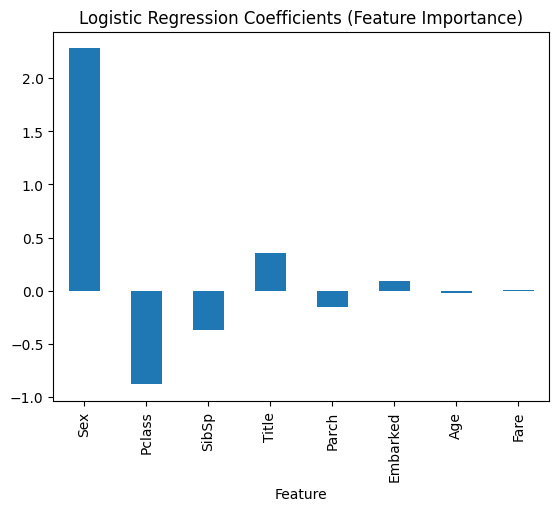

In [ ]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop features influencing survival:")
print(coeff_df)

coeff_df.plot(kind='bar', x='Feature', y='Coefficient', legend=False)
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_final)

## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Sample Submission File

In [ ]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [ ]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Generate Results

In [ ]:
submission_df = pd.DataFrame({
    'PassengerId': dt['PassengerId'],
    'Survived': y_pred
})

submission_df.to_csv('submission_file.csv', index=False)
print("\n✅ Submission file created: submission_file.csv")



✅ Submission file created: submission_file.csv
